# Implement various image enhancement techniques using Built-in and user defined functions.

1. Image Negative
2. Gray Level Slicing
3. Histogram Equalization

In [10]:
!curl -o Spidey.jpg https://static01.nyt.com/images/2023/06/01/multimedia/spiderman2-tljp/spiderman2-tljp-videoSixteenByNineJumbo1600.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

100  505k  100  505k    0     0  58924      0  0:00:08  0:00:08 --:--:--  113k


In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [12]:
image = cv2.imread(r'Spidey.jpg')

In [13]:
# Convert BGR to RGB (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

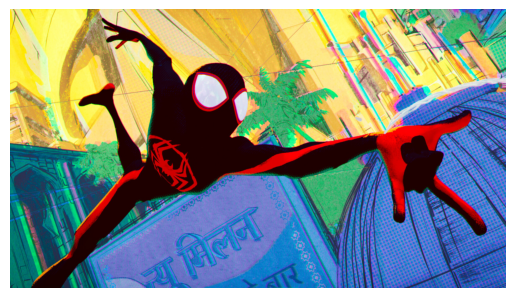

In [14]:
# Display the image
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# 1. Image Negative

In [35]:
# Create a negative image
negative_image = 255 - image

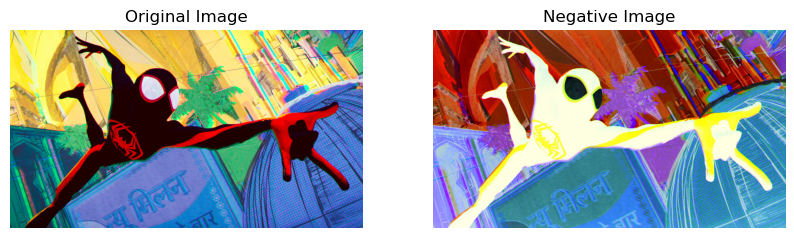

In [36]:

# Plot original and equalized images using matplotlib
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Equalized image
plt.subplot(1, 2, 2)
plt.imshow(negative_image, cmap='gray')
plt.title('Negative Image')
plt.axis('off')

plt.show()

# 2. Gray Level Slicing

In [25]:
# Set the threshold range
low = 100
high = 200

In [26]:
# Apply gray level slicing
sliced_image = np.where((image >= low) & (image <= high), 255, 0).astype(np.uint8)

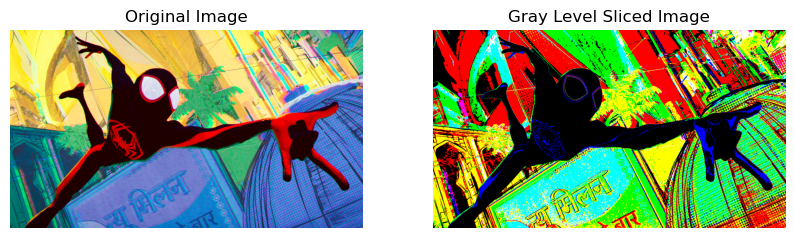

In [28]:
# Plot original and equalized images using matplotlib
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Equalized image
plt.subplot(1, 2, 2)
plt.imshow(sliced_image, cmap='gray')
plt.title('Gray Level Sliced Image')
plt.axis('off')

plt.show()

# 3. Histogram Equalization

In [29]:
# Check the type and shape of the image
print("Image dtype:", image.dtype)
print("Image shape:", image.shape)

Image dtype: uint8
Image shape: (899, 1600, 3)


In [30]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform histogram equalization
equalized_image = cv2.equalizeHist(gray_image)

In [31]:
# Calculate histograms
hist_original = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

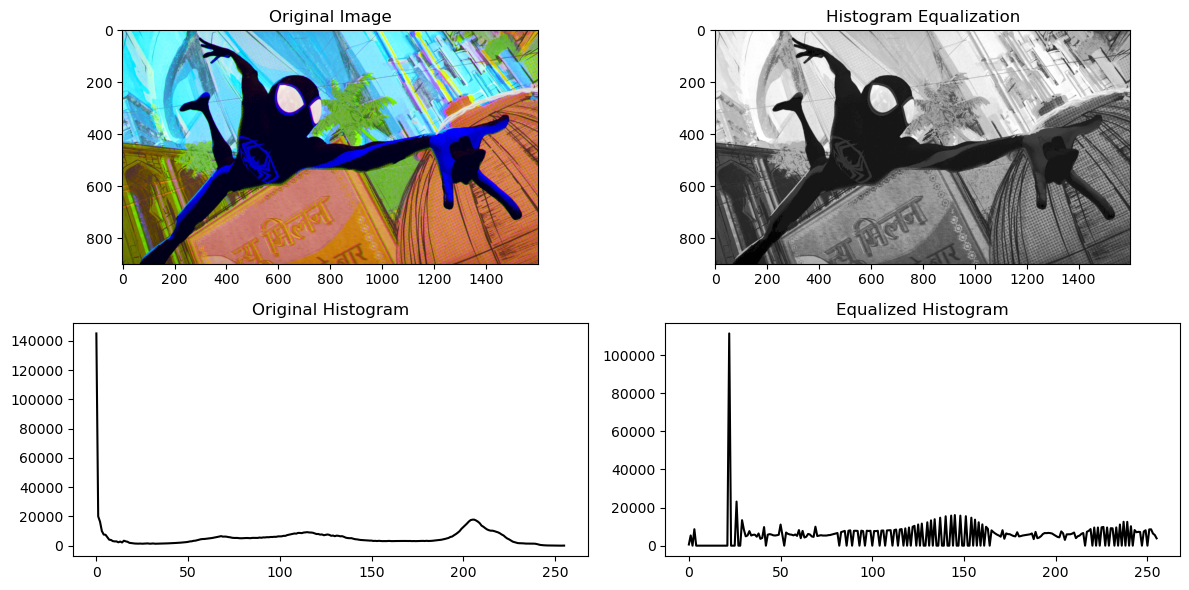

In [32]:
# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalization')

plt.subplot(2, 2, 3)
plt.plot(hist_original, color='black')
plt.title('Original Histogram')

plt.subplot(2, 2, 4)
plt.plot(hist_equalized, color='black')
plt.title('Equalized Histogram')

plt.tight_layout()
plt.show()

# Adaptive Histogram Equalization

In [33]:
# Create a CLAHE object (Arguments are optional)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform histogram equalization
equalized_image = cv2.equalizeHist(gray_image)

# Apply CLAHE to the image
equalized_img = clahe.apply(gray_image)

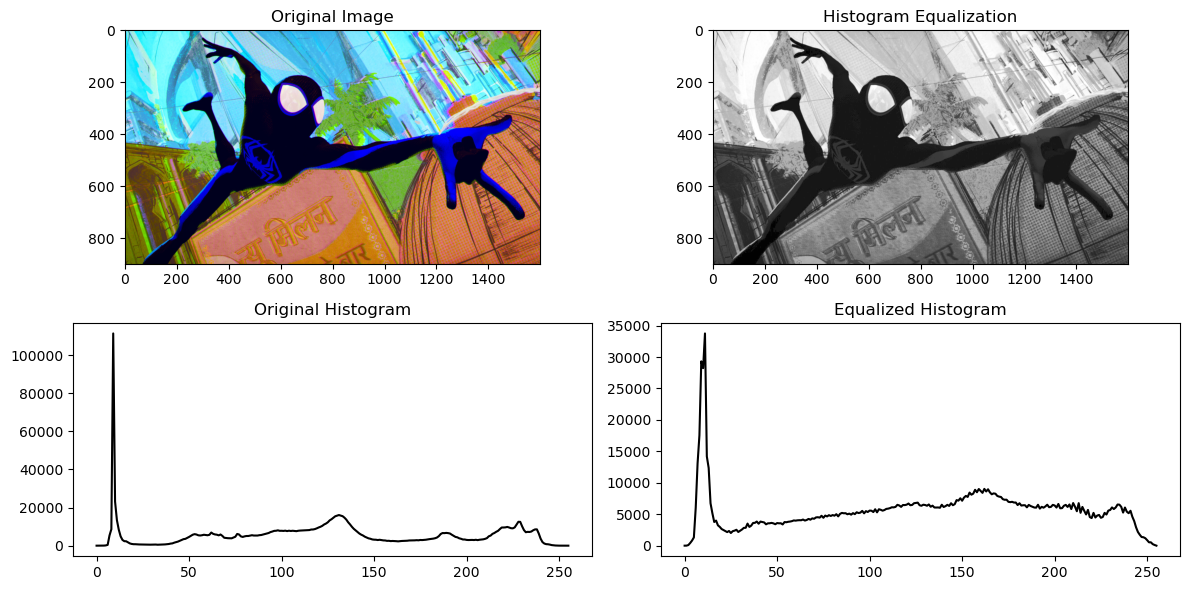

In [34]:
# Compute histograms
hist_orig = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
hist_equ = cv2.calcHist([equalized_img], [0], None, [256], [0, 256])
hist_clahe = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalization')

plt.subplot(2, 2, 3)
plt.plot(hist_orig, color='black')
plt.title('Original Histogram')

plt.subplot(2, 2, 4)
plt.plot(hist_equ, color='black')
plt.title('Equalized Histogram')

plt.tight_layout()
plt.show()